# P06: Goodness-of-fit and hypothesis testing

## Problem 1: Fitting stellar luminosities

Let us assume that we measure the luminosity as a function of time for four samples of stars. Each sample contains 100 stars and we measure their luminosity at 50 times each. The recorded values for the stellar luminosities for four samples are in the `data` directory and designated `starcat_1.npy`, `starcat_2.npy`, `starcat_3.npy` and `starcat_4.npy`. The values are given in units of $L_\odot$.

Our hypothesis is that all stars in these four catalogs are non-variable, i.e. their luminosity does not vary as a function of time, and that the observed luminosities are normally distributed with a standard deviation of $\sigma(L_*)=0.1L_*$.

(i) Test if the data is consistent with this hypothesis by comparing the data to model predictions and computing the $\chi^2$ values of the observed data with respect to the assumed model.

(ii) Try to diagnose the reasons for the discrepancies found (if any).

In the next three problems, we want to analyze seven astrophysical catalogs containing the magnitudes of galaxies in three different wavelength bands. The goal is to find out if some of the datasets are not consistent with each other.

In [87]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import scipy.integrate as si

s1 = np.load('data/starcat_1.npy')
s2 = np.load('data/starcat_2.npy')
s3 = np.load('data/starcat_3.npy')
s4 = np.load('data/starcat_4.npy')

sigma = 0.1

def X(entry):
    zi = (entry - np.mean(entry))/np.std(entry)
    return np.sum(zi**2)

def gamma(z):
    def integrand(x):
        return x**(z-1)*np.exp(-x)
    return si.quad(integrand,0, np.inf)[0] 

def chi(list):
    k = len(list)
    if k % 2 == 0:
        return 1/( 2**(k/2) * gamma(k/2)) * X(list)**(k/2-1) * np.exp(-X(list)/2)
    elif k % 2 != 0:
        print('k is not even')

## Problem 2: Magnitude distributions and colors

Use `astropy.io.fits` to load the six fits files called `magnitudes0.fits` to `magnitudes5.fits`. Find out how to extract the magnitudes of the galaxies in each of the files in $g$, $r$, and $i$ bands. Write a function that takes the fits object and returns the colors:
$$C_1 =  \mathrm{mag}_g - \mathrm{mag}_r$$
$$C_2 =  \mathrm{mag}_i - \mathrm{mag}_r$$
Plot histograms of the colors and the color-color plane of each of the catalogs. 

Can you spot the non-consistent catalogs by eye?

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import glob

params = {'axes.linewidth'  :  1.5,
		  'xtick.labelsize' : 19,
		  'ytick.labelsize' : 19,
		  'legend.fontsize' : 19,
		  'axes.labelsize'  : 25,
		  'axes.titlesize'  : 25,
		  'errorbar.capsize':  4,
		  'figure.figsize'  : (10,10),
		  'axes.grid'       : True,
		  'grid.linewidth'  : 1}
plt.rcParams.update(params)

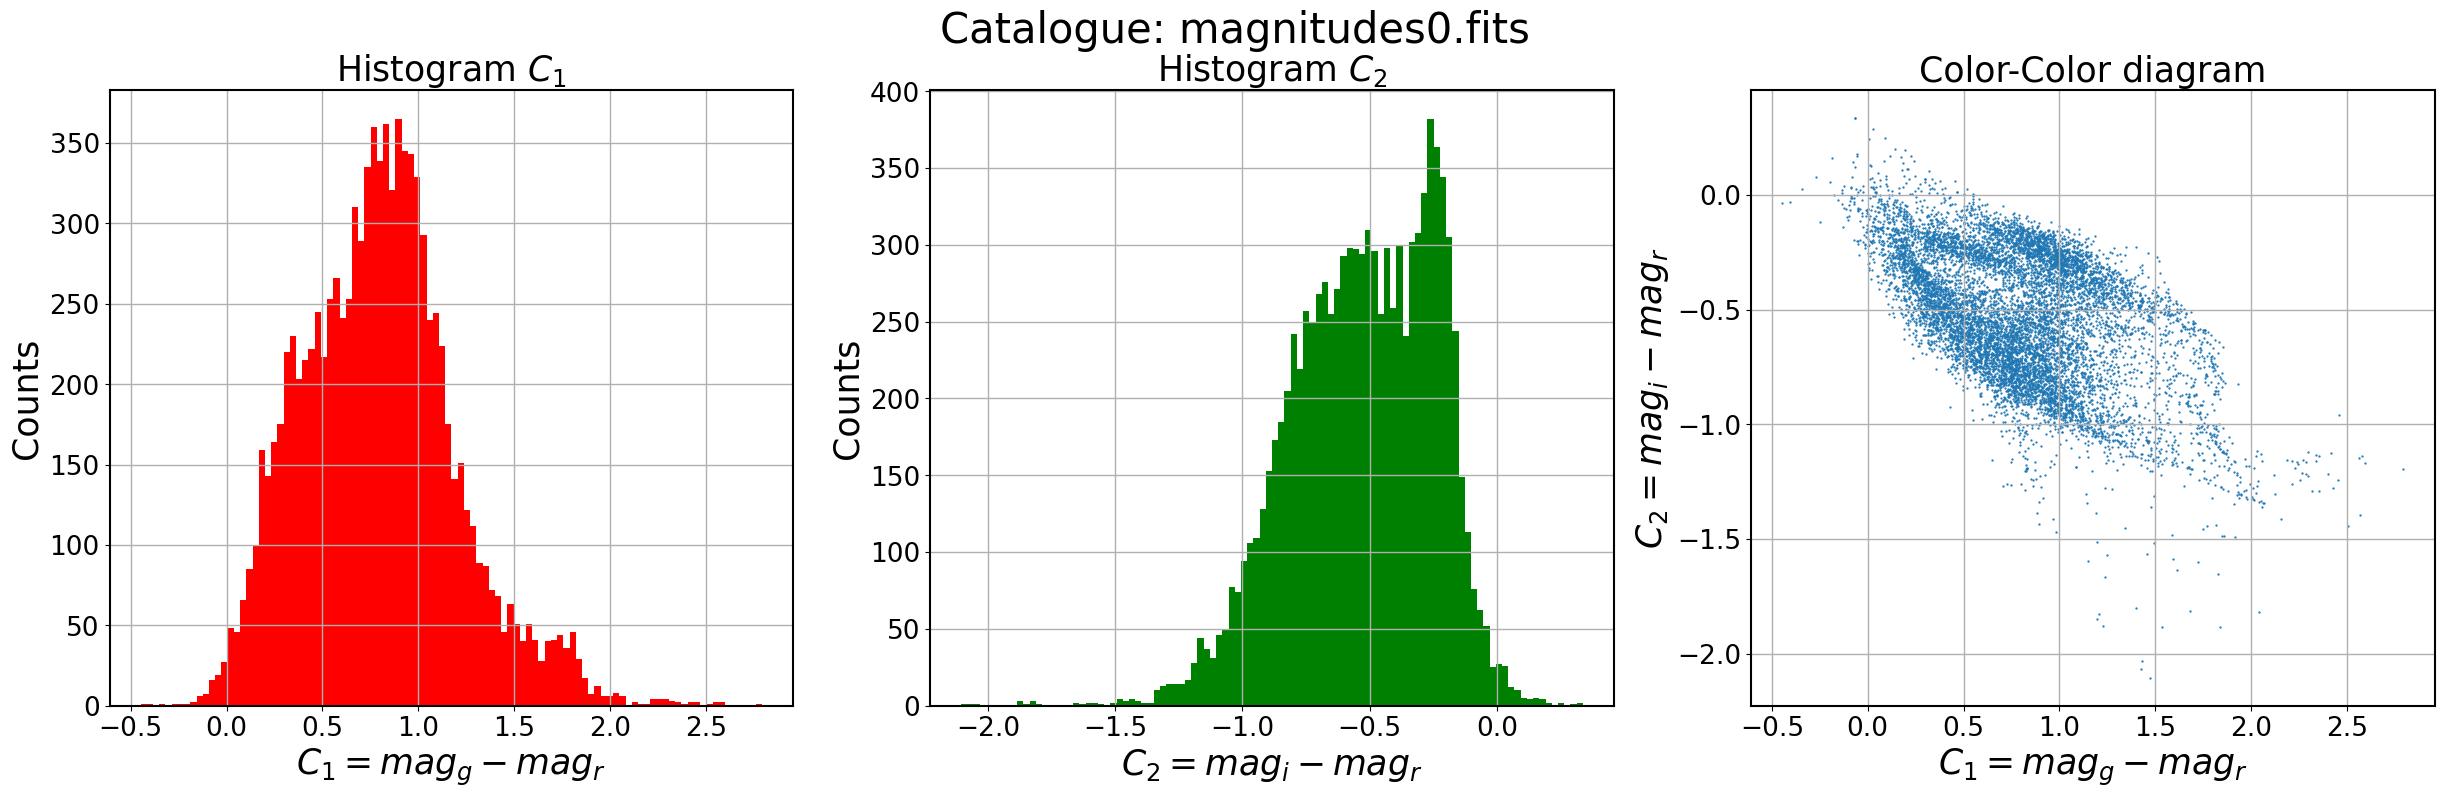

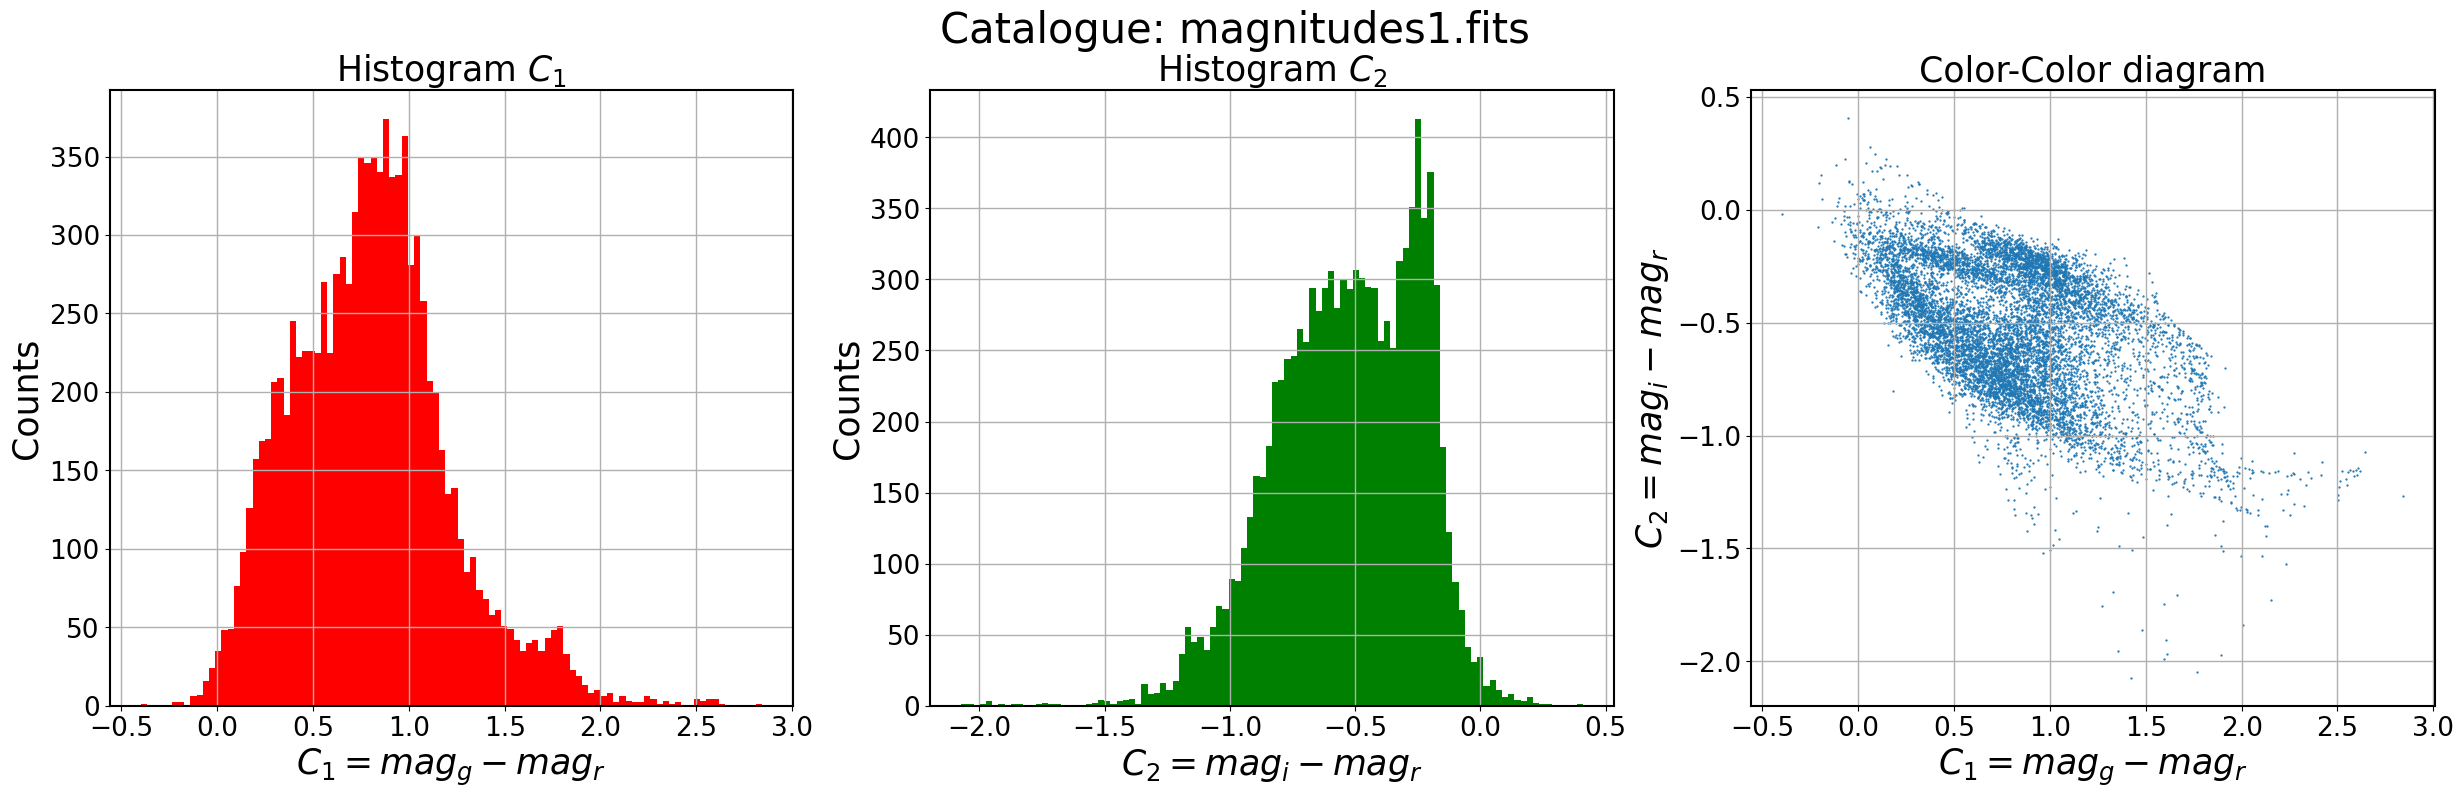

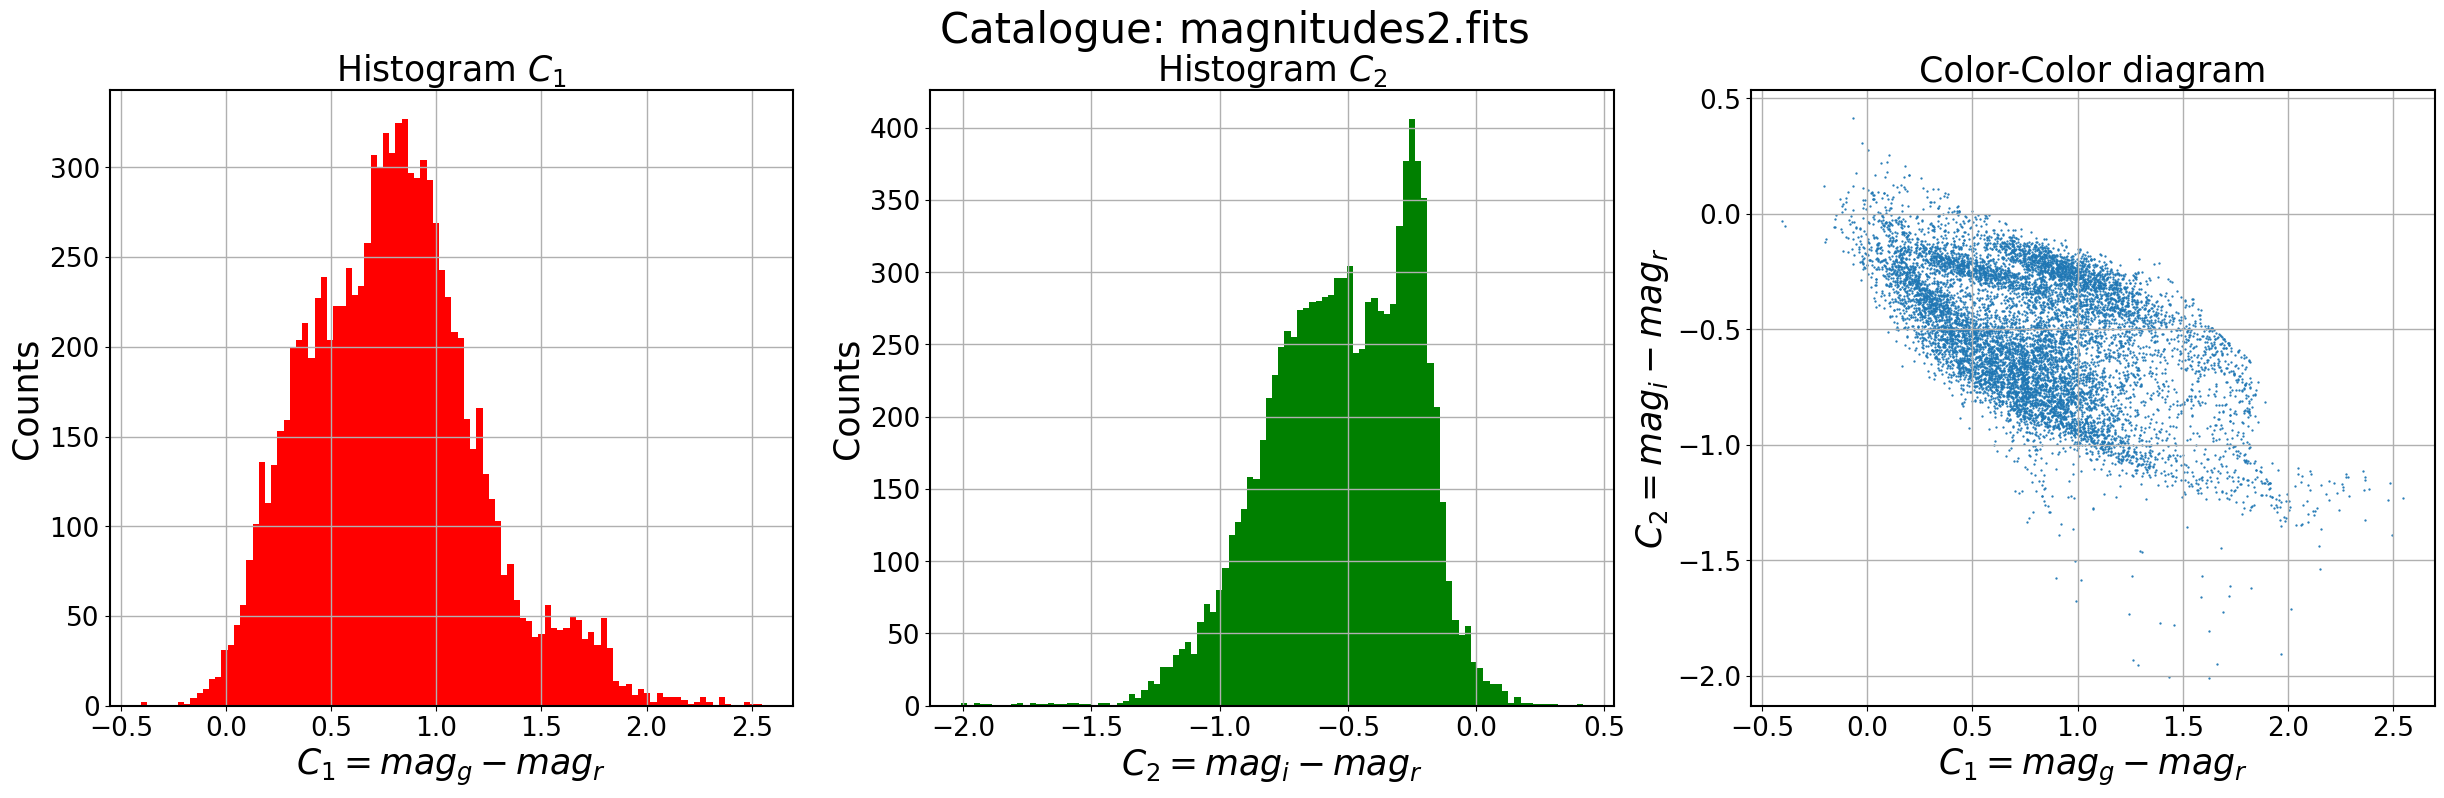

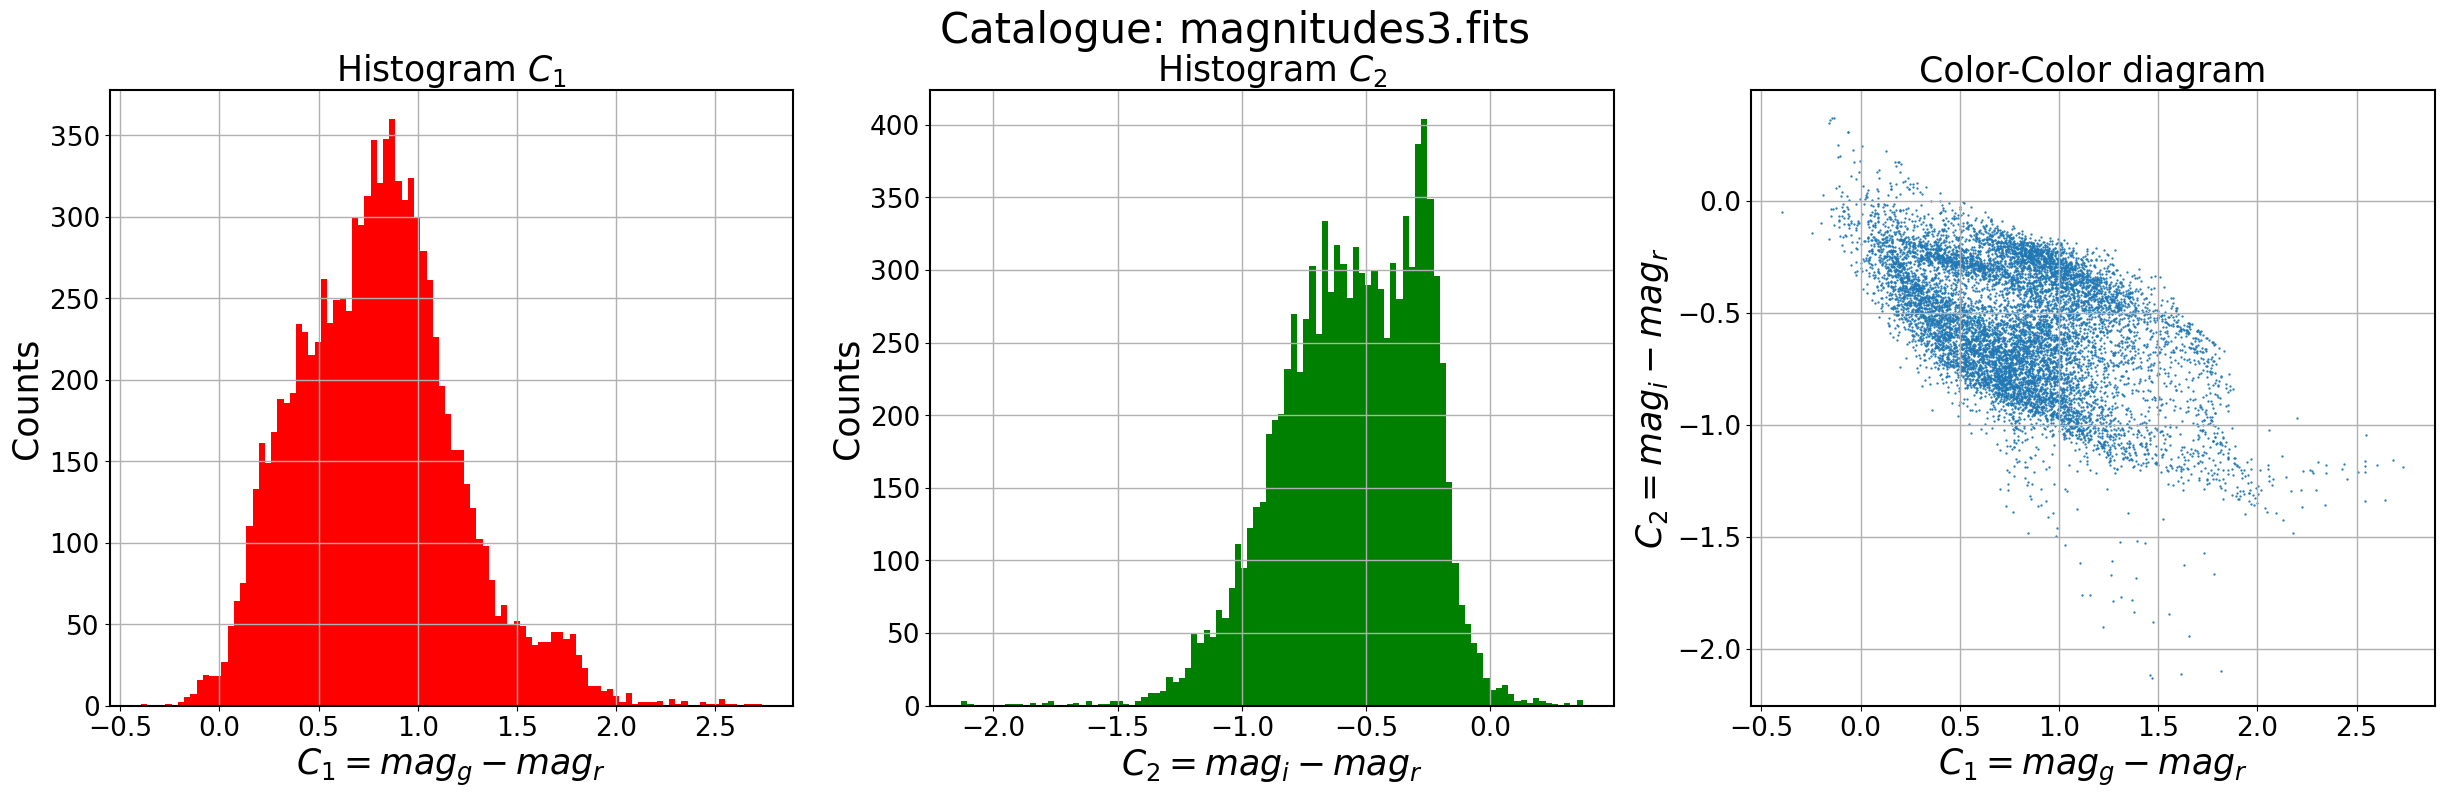

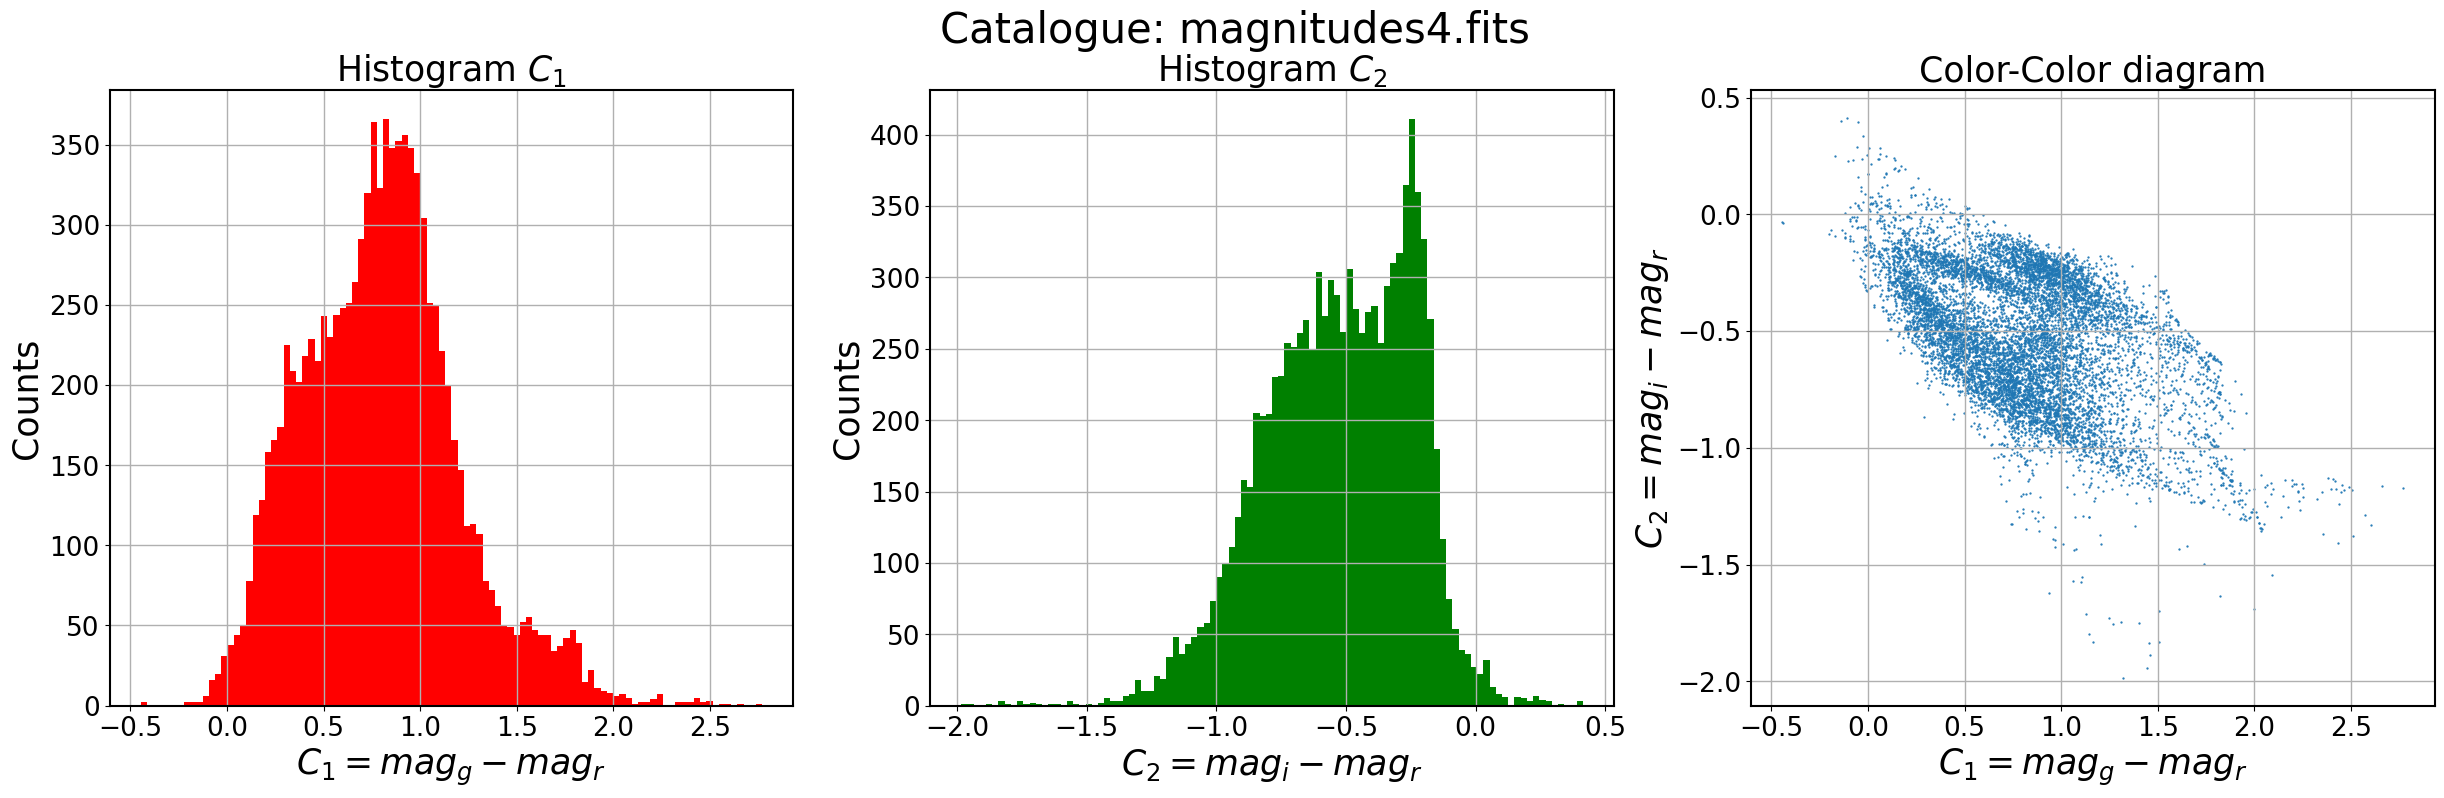

In [ ]:
mag_files = glob.glob(f'data/magnitudes*')

def get_colors(mag_file):
    with fits.open(mag_file) as hdulist:
        data = hdulist[1].data

        mag_g = np.zeros(len(data))
        mag_r = np.zeros(len(data))
        mag_i = np.zeros(len(data))
                
        for i in range(len(data)):
            mag_g[i] = data[i][0]
            mag_r[i] = data[i][1]
            mag_i[i] = data[i][2]
        c1 = mag_g - mag_r
        c2 = mag_i - mag_r
    return c1, c2


C1 = np.zeros((6,10000))
C2 = np.zeros((6,10000))

for i in range(len(mag_files)):
    entry = mag_files[i]
    
    C1[i] = get_colors(entry)[0]
    C2[i] = get_colors(entry)[1]

    fig, ax = plt.subplots(1,3, figsize = (30,8))
    ax[0].hist(C1[i], bins = 100, color = 'red')
    ax[0].set_xlabel('$C_1 = mag_g - mag_r$')
    ax[0].set_ylabel('Counts')
    ax[0].set_title('Histogram $C_1$')

    ax[1].hist(C2[i], bins = 100, color = 'green')
    ax[1].set_xlabel('$C_2 = mag_i - mag_r$')
    ax[1].set_ylabel('Counts')
    ax[1].set_title('Histogram $C_2$')

    ax[2].scatter(C1[i],C2[i], s = 0.4)
    ax[2].set_xlabel('$C_1 = mag_g - mag_r$')
    ax[2].set_ylabel('$C_2 = mag_i - mag_r$')
    ax[2].set_title('Color-Color diagram')

    plt.suptitle(f'Catalogue: {entry[-16:]}', fontsize = 30)
    plt.show()

## Problem 3: T-test

Use the t-test (from `scipy.stats.ttest_ind`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

Which catalogs are non-consistent with 95% confidence? 

In [65]:
from scipy.stats import ttest_ind as T_test

alpha = 0.05

for i in range(len(mag_files)):
    for j in range(i + 1, len(mag_files)):
        statistic_C1, pvalue_C1 = T_test(C1[i],C1[j])
        statistic_C2, pvalue_C2 = T_test(C2[i],C2[j])
        
        if pvalue_C1 < alpha:
            print(f'C1 of catalogues {i} and {j} are non-consitent with 95% confidence.')
        if pvalue_C2 < alpha:
            print(f'C2 of catalogues {i} and {j} are non-consitent with 95% confidence.')

C2 of catalogues 0 and 3 are non-consitent with 95% confidence.
C2 of catalogues 1 and 3 are non-consitent with 95% confidence.
C2 of catalogues 2 and 3 are non-consitent with 95% confidence.
C2 of catalogues 3 and 4 are non-consitent with 95% confidence.
C2 of catalogues 3 and 5 are non-consitent with 95% confidence.


## Problem 4: KS-test

Use the KS-test (from `scipy.stats.ks_2samp`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

(i) Which catalogs are non-consistent with 95% confidence? 

In [63]:
from scipy.stats import ks_2samp as KS_test

alpha = 0.05

for i in range(len(mag_files)):
    for j in range(i + 1, len(mag_files)):
        statistic_C1, pvalue_C1 = KS_test(C1[i],C1[j])
        statistic_C2, pvalue_C2 = KS_test(C2[i],C2[j])

        if pvalue_C1 < alpha:
            print(f'C1 of catalogues {i} and {j} are non-consitent with 95% confidence.')
        if pvalue_C2 < alpha:
            print(f'C2 of catalogues {i} and {j} are non-consitent with 95% confidence.')

C2 of catalogues 0 and 3 are non-consitent with 95% confidence.
C1 of catalogues 0 and 5 are non-consitent with 95% confidence.
C2 of catalogues 0 and 5 are non-consitent with 95% confidence.
C2 of catalogues 1 and 3 are non-consitent with 95% confidence.
C2 of catalogues 1 and 5 are non-consitent with 95% confidence.
C2 of catalogues 2 and 3 are non-consitent with 95% confidence.
C1 of catalogues 2 and 5 are non-consitent with 95% confidence.
C2 of catalogues 2 and 5 are non-consitent with 95% confidence.
C2 of catalogues 3 and 4 are non-consitent with 95% confidence.
C2 of catalogues 3 and 5 are non-consitent with 95% confidence.
C2 of catalogues 4 and 5 are non-consitent with 95% confidence.


(ii) How do you explain the discrepancies between findings of problem 3 and 4?